In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

In [14]:
WORKDIR = "/home/choij/workspace/ChargedHiggsAnalysis/GraphNeuralNet"
CHANNEL = "Skim3Mu"

SIGNALs = ["MHc-70_MA-65", "MHc-100_MA-95", "MHc-130_MA-90", "MHc-160_MA-85", "MHc-160_MA-120"]
BACKGROUNDs = ["ttZ"]

In [15]:
def readFitness(SIG, BKG):
    BASEDIR = f"{WORKDIR}/{CHANNEL}/{SIG}_vs_{BKG}"
    fitnessDict = {}
    for i in range(5):
        csv = pd.read_csv(f"{BASEDIR}/CSV/GAOptimGen{i}.csv").transpose()
        thisFitness = []
        for idx in csv.index: thisFitness.append(float(csv.loc[idx, 'fitness']))
        fitnessDict[f"Gen{i}"] = thisFitness
    
    return fitnessDict

In [16]:
def getChromosomes(SIG, BKG):
    # get mean fitness values
    fitness = readFitness(SIG, BKG)
    meanFitness = {}
    for key, value in fitness.items(): meanFitness[key] = np.mean(value)

    # choose lowest mean fitness generation
    minFitness = sorted(meanFitness.items(), key=lambda item: item[1])[0]
    gen = minFitness[0]
    
    # read csv file
    BASEDIR = f"{WORKDIR}/{CHANNEL}/{SIG}_vs_{BKG}"
    csv = pd.read_csv(f"{BASEDIR}/CSV/GAOptim{gen}.csv").transpose()
    
    return csv

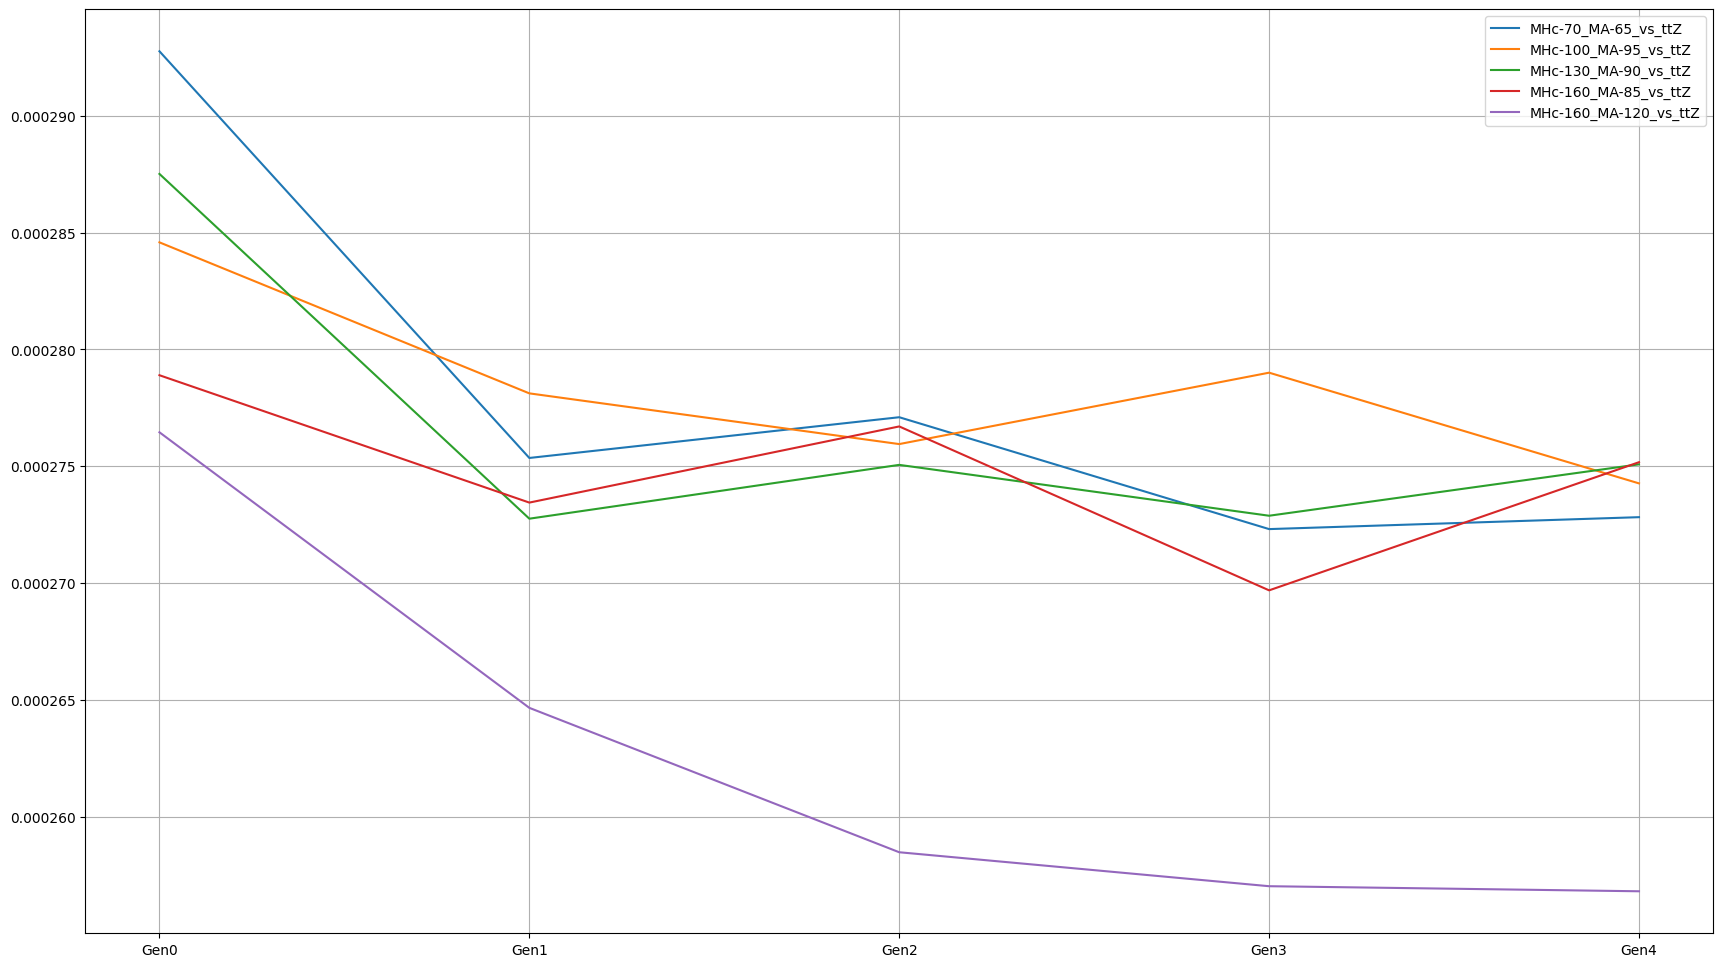

In [17]:
from itertools import product
plt.figure(figsize=(21, 12))
for sig, bkg in product(SIGNALs, BACKGROUNDs):
    fitness = readFitness(sig, bkg)
    meanFitness = {}
    for key, value in fitness.items(): 
        meanFitness[key] = np.mean(value)
    plt.plot(meanFitness.keys(), meanFitness.values(), label=f"{sig}_vs_{bkg}")
plt.legend(loc='best')
plt.grid(True)
plt.show()